<a href="https://colab.research.google.com/github/rojanshrestha12/AI_Projects/blob/main/2431481_Rojan_Shrestha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Assignment

/content/drive/MyDrive/Assignment


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Problem-1
1. Data Exploration and Understanding

In [ ]:
#Loding the Dataset
df = pd.read_csv('WHR-2024-5CS037.csv')
df.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [ ]:
ro_col = df.shape
print("Number of Rows: ", ro_col[0])
print("Number of Columns: ", ro_col[1])

print("Data Types: ")
df.dtypes

Number of Rows:  143
Number of Columns:  9
Data Types: 


,0
Country name,object
score,float64
Log GDP per capita,float64
Social support,float64
Healthy life expectancy,float64
Freedom to make life choices,float64
Generosity,float64
Perceptions of corruption,float64
Dystopia + residual,float64


In [ ]:
#calculate mean, median and standard devition
mean = df['score'].mean()
median = df['score'].median()
std_dev = df['score'].std()
print("Mean: ", mean)
print("Median: ", median)
print("Standard Deviation: ", std_dev)

#Finding the country with highest and lowest happiness score
max_value = df.loc[df['score'].idxmax()]
min_value = df.loc[df['score'].idxmin()]
print("Highest happiness score: ")
print(max_value['Country name'])
print("Minimum Value: ")
print(min_value['Country name'])

Mean:  5.52758041958042
Median:  5.785
Standard Deviation:  1.1707165099442995
Highest happiness score: 
Finland
Minimum Value: 
Afghanistan


In [ ]:
missing_values = df.isnull().sum()
print("Missing Values: ")
missing_values

Missing Values: 


,0
Country name,0
score,0
Log GDP per capita,3
Social support,3
Healthy life expectancy,3
Freedom to make life choices,3
Generosity,3
Perceptions of corruption,3
Dystopia + residual,3


In [ ]:
df.dropna(inplace=True)

In [ ]:
#countries with score graeater than 7.5
filtered_df = df[df['score'] > 7.5]
filtered_df

#top ten sorted dataset in descending order
sorted_df = filtered_df.sort_values(by = 'Log GDP per capita', ascending=False)
sorted_df.head()

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082


In [ ]:
#a new column to catorize a country into three categories.
def categorize_happiness(score):
    if score < 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'

df['Happiness Category'] = df['score'].apply(categorize_happiness)
print(df[['Happiness Category']])

    Happiness Category
0                 High
1                 High
2                 High
3                 High
4                 High
..                 ...
138                Low
139                Low
140                Low
141                Low
142                Low

[140 rows x 1 columns]


2. Data Visulization

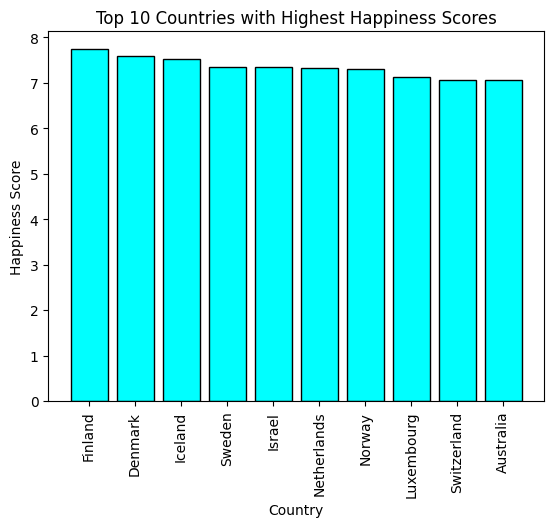

In [ ]:
import matplotlib.pyplot as plt

#top 10 happiest countries by score using bar chart
top_ten_happiness = df.nlargest(10, 'score')
plt.bar(top_ten_happiness['Country name'], top_ten_happiness['score'], edgecolor= 'black', color='Cyan')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Top 10 Countries with Highest Happiness Scores')
plt.xticks(rotation=90)
plt.show()


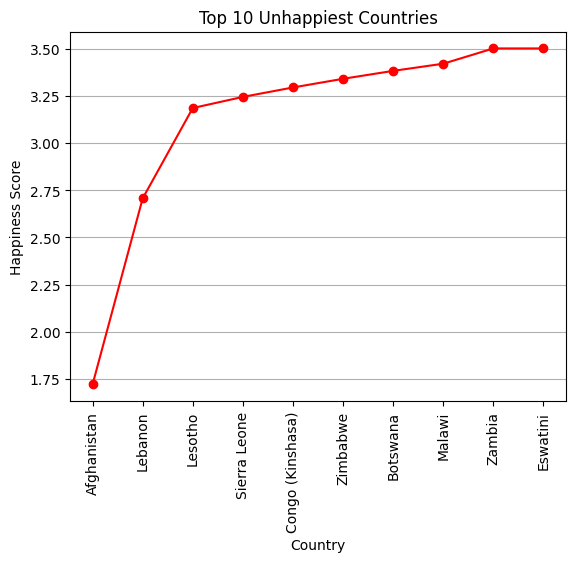

In [ ]:
#top ten unhappiest by scire wuing line chart.
top_10_unhappiest = df.nsmallest(10, 'score')
plt.plot(top_10_unhappiest['Country name'], top_10_unhappiest['score'], marker='o', color='Red')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Top 10 Unhappiest Countries')
plt.grid(axis='y')
plt.xticks(rotation=90)
plt.show()


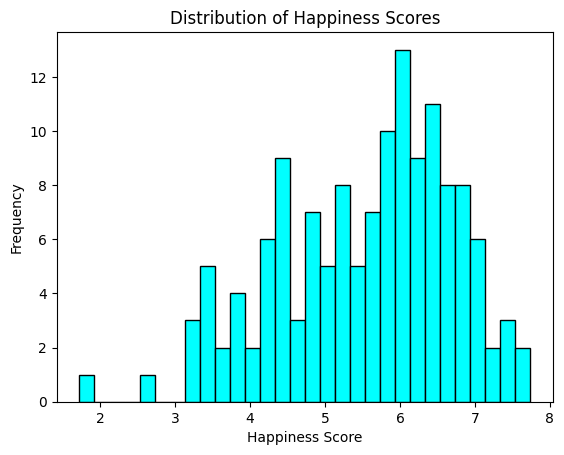

In [ ]:
#score column to show it's distribution using histogram
plt.hist(df['score'], bins=30, color='cyan',edgecolor = 'black')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.title('Distribution of Happiness Scores')
plt.show()

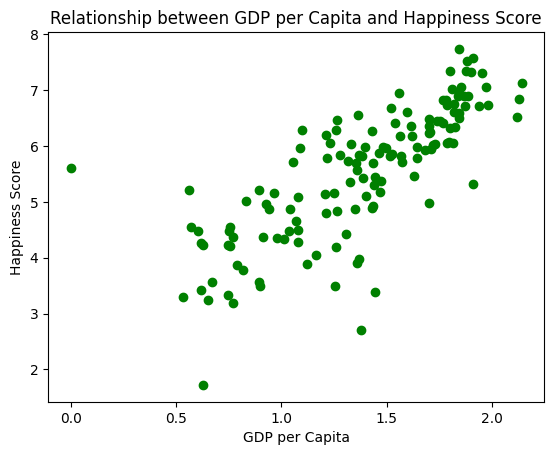

In [ ]:
#scatter plot between gdp anf score
plt.scatter(df['Log GDP per capita'], df['score'], color='green')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.title('Relationship between GDP per Capita and Happiness Score')
plt.show()

3.2 Problem - 2 - Some Advance Data Exploration Task:

Task - 1 - Setup Task - Preparing the South-Asia Dataset:

In [ ]:
import pandas as pd
#define the countries
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
df = pd.read_csv('WHR-2024-5CS037.csv')

#filter the dataset from the list
filtered_df = df[df['Country name'].isin(south_asian_countries)]

#save the filtered as a csv file
filtered_df.to_csv('south_asia_happiness.csv')
df = pd.read_csv('south_asia_happiness.csv')

Task - 2 - Composite Score Ranking:

In [ ]:
#adding a new column withe the following metrics
filtered_df['Composite Score'] = (0.40 * filtered_df['Log GDP per capita'] +
                                  0.30 * filtered_df['Social support'] +
                                  0.30 * filtered_df['Healthy life expectancy'])



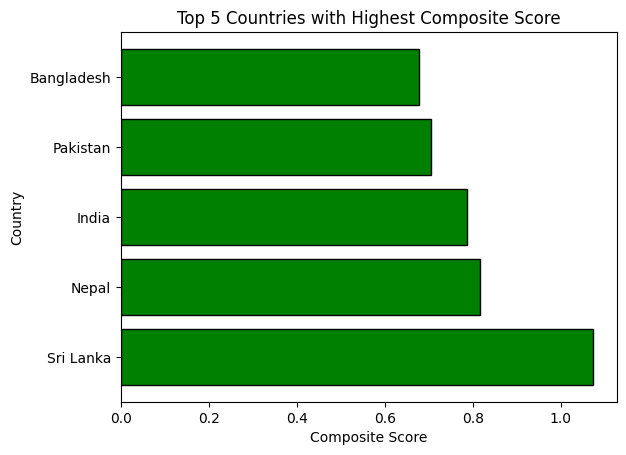

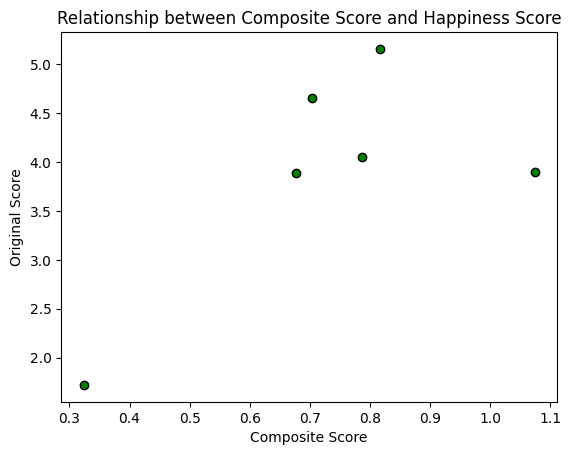

In [ ]:
#Rank the countries based on composite score in descending order
filtered_df = filtered_df.sort_values(by='Composite Score', ascending = False)
top_five = filtered_df.head(5)
plt.barh(top_five['Country name'], top_five['Composite Score'], color='green', edgecolor= 'black')
plt.xlabel('Composite Score')
plt.ylabel('Country')
plt.title('Top 5 Countries with Highest Composite Score')
plt.show()
print("\n")

#Top 5 countries horizontal bar shoeing composite score
plt.scatter(filtered_df['Composite Score'], filtered_df['score'], color = 'green', edgecolor='black')
plt.xlabel('Composite Score')
plt.ylabel('Original Score')
plt.title('Relationship between Composite Score and Happiness Score')
plt.show()

#Will composite score with the original score. Visualize


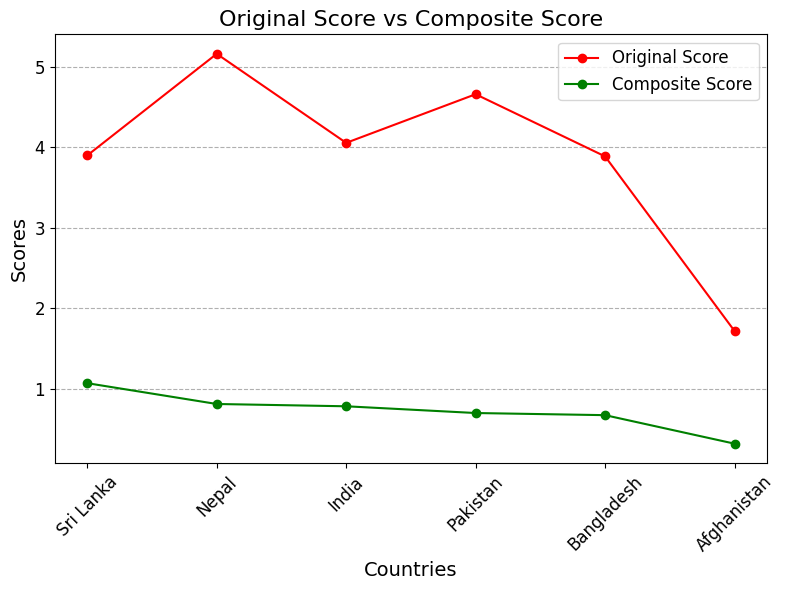

In [ ]:
# comparing the original ranking acc to score and composite ranking acc to composite score
# Plot the Original Score as a line plot
plt.figure(figsize=(8, 6))
plt.plot(filtered_df['Country name'],filtered_df['score'],color='red',marker='o',linestyle='-',label='Original Score')

# Plot the Composite Score as a line plot
plt.plot(filtered_df['Country name'],filtered_df['Composite Score'],color='green',marker='o',linestyle='-',label='Composite Score')

# Set plot labels and title
plt.xlabel('Countries', fontsize=14)
plt.ylabel('Scores', fontsize=14)
plt.title('Original Score vs Composite Score', fontsize=16)

# Rotate x-axis labels for better readability and adjust spacing
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

#grid lines for better score comparison
plt.grid(axis='y', linestyle='--')
plt.legend(fontsize=12, loc='upper right')
# Add padding around the plot
plt.tight_layout()
# Show the plot
plt.show()



Task - 3 - Outlier Detection:

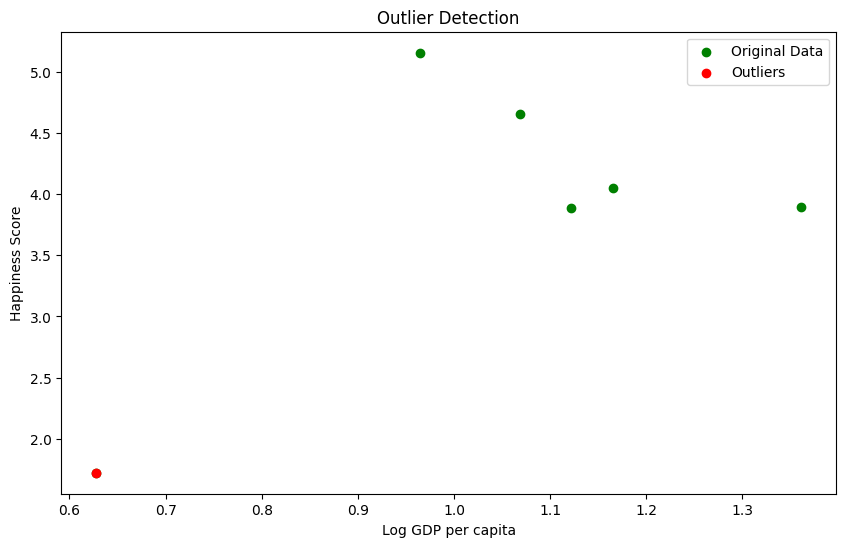

Average Score (Non-Outliers):  4.3306000000000004
Average GDP per Capita (Non-Outliers):  1.1366


In [ ]:
df = pd.read_csv('south_asia_happiness.csv')
# define outliers

def outliers(ser) :
  Q1 = ser.quantile(0.25)
  Q3 = ser.quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR
  return (ser < lower) | (ser > upper)

filtered_df['score outliers'] = outliers(filtered_df['score'])
filtered_df['gdp outliers']  = outliers(filtered_df['Log GDP per capita'])

filtered_df['Outlier']= filtered_df['score outliers'] | filtered_df['gdp outliers']

outliers_df = filtered_df[filtered_df['Outlier']]
outliers_df

#create a scatter plot with gdp and score highlighting oultiers
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['Log GDP per capita'], filtered_df['score'], color='green', label='Original Data')
plt.scatter(outliers_df['Log GDP per capita'], outliers_df['score'], color='red', label='Outliers')
plt.xlabel('Log GDP per capita')
plt.ylabel('Happiness Score')
plt.title('Outlier Detection')
plt.legend()
plt.show()

#Characteristics of outliersand impact on regional averages
avg_score = filtered_df['score'].mean()
avg_gdp = filtered_df['Log GDP per capita'].mean()
non_outliers_df = filtered_df[~filtered_df['Outlier']]
avg_score_non_outliers = non_outliers_df['score'].mean()
avg_gdp_non_outliers = non_outliers_df['Log GDP per capita'].mean()
print("Average Score (Non-Outliers): ", avg_score_non_outliers)
print("Average GDP per Capita (Non-Outliers): ", avg_gdp_non_outliers)


Task - 4 - Exploring Trends Across Metrics:

Correlation between 'score' and 'Freedom to make life choices': 0.8005185224163315
Correlation between 'score' and 'Generosity': 0.874512371253192


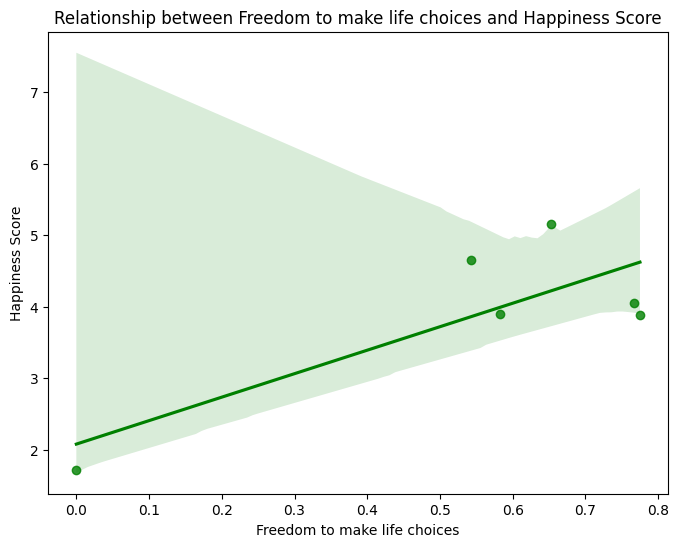

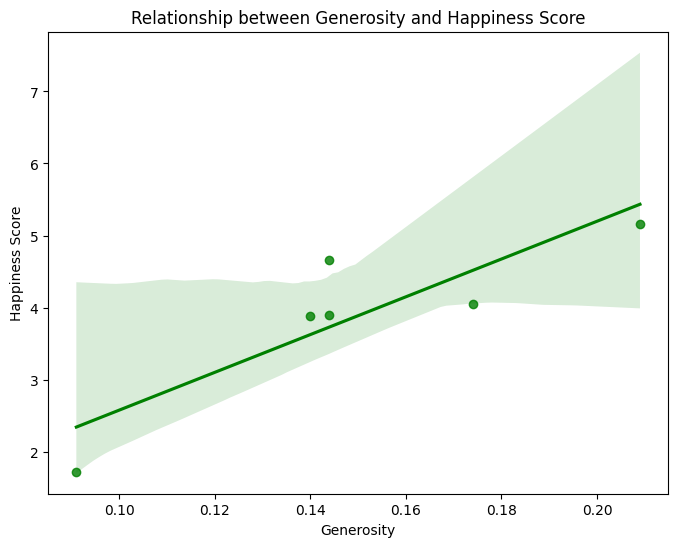

The strongest correlation is between 'score' and 'Generosity' with a correlation of 0.874512371253192.
The weakest correlation is between 'score' and 'Freedom to make life choices' with a correlation of 0.8005185224163315.


In [ ]:
south_df = pd.read_csv('south_asia_happiness.csv')

metrics = ['Freedom to make life choices', 'Generosity']
correlations = {
    metric: south_df['score'].corr(south_df[metric])
    for metric in metrics
}

for metric, corr in correlations.items():
    print(f"Correlation between 'score' and '{metric}': {corr}")

for metric in metrics:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=metric, y='score', data=south_df, color='green')
    plt.xlabel(metric)
    plt.ylabel('Happiness Score')
    plt.title(f'Relationship between {metric} and Happiness Score')
    plt.show()

strongest_metric = max(correlations, key=correlations.get)
print(f"The strongest correlation is between 'score' and '{strongest_metric}' with a correlation of {correlations[strongest_metric]}.")
weakest_metric = min(correlations, key=correlations.get)
print(f"The weakest correlation is between 'score' and '{weakest_metric}' with a correlation of {correlations[weakest_metric]}.")

Task - 5 - Gap Analysis:

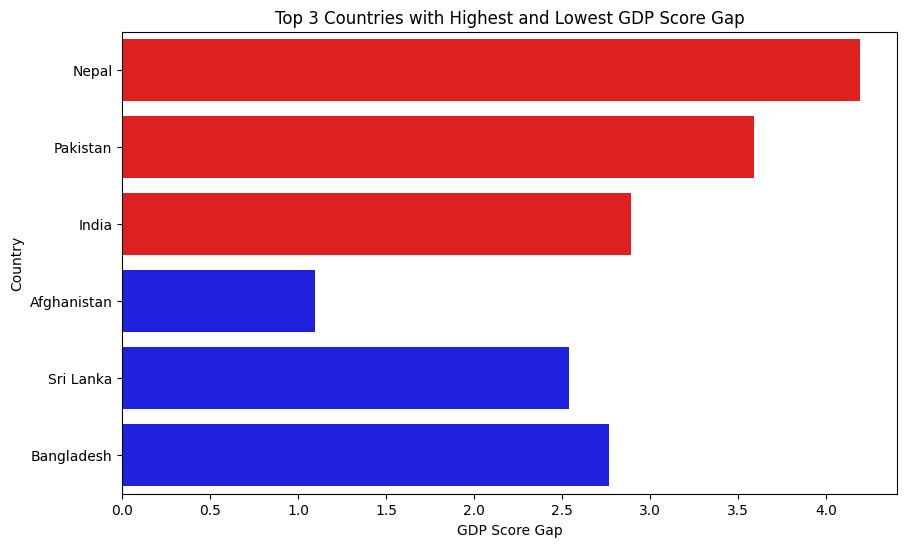

In [ ]:
import seaborn as sns
south_df['dgp score gap'] = abs(south_df['Log GDP per capita'] - south_df['score'])

#by gap in ascending and descending order
ascen_gap = south_df.sort_values(by='dgp score gap', ascending=True)
descen_gap = south_df.sort_values(by='dgp score gap', ascending=False)


top_positive = descen_gap.head(3)
top_negative = ascen_gap.head(3)

plt.figure(figsize=(10, 6))
sns.barplot(x='dgp score gap', y='Country name', data=top_positive, color='red')
sns.barplot(x='dgp score gap', y='Country name', data=top_negative, color='blue')
plt.xlabel('GDP Score Gap')
plt.ylabel('Country')
plt.title('Top 3 Countries with Highest and Lowest GDP Score Gap')
plt.show()

3.3 Problem - 3 - Comparative Analysis:

Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:

In [ ]:
df = pd.read_csv('WHR-2024-5CS037.csv')

middle_east_countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
"United Arab Emirates", "Yemen"]

middle_df = df[df['Country name'].isin(middle_east_countries)]

1. Descriptive Statistics:

In [ ]:
#calculate the mean, median, standard deviation
mean_sa = south_df['score'].mean()
std_sa = south_df['score'].std()
mean_me = middle_df['score'].mean()
std_me = middle_df['score'].std()
print("South Asia Mean Score: ", mean_sa)
print("South Asia Standard Deviation: ", std_sa)
print("Middle East Mean Score: ", mean_me)
print("Middle East Standard Deviation: ", std_me)
print("\n")

#which region has higest happiest score
if (mean_sa > mean_me):
    print("South Asia has higher mean score")
else:
    print("Middle East has higher mean score")

South Asia Mean Score:  3.895666666666667
South Asia Standard Deviation:  1.1770690152521504
Middle East Mean Score:  5.412100000000001
Middle East Standard Deviation:  1.5662011684327144


Middle East has higher mean score


2. Top and Bottom Performers:

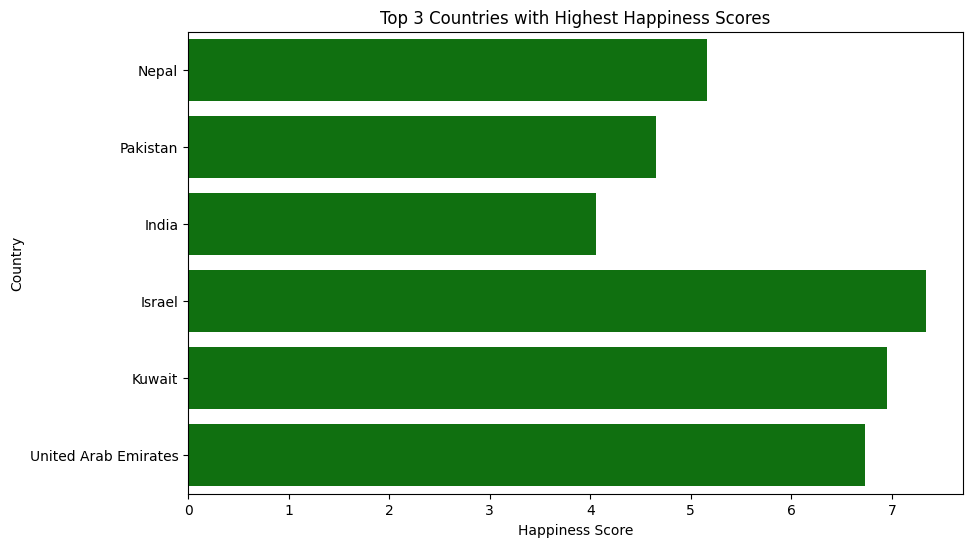

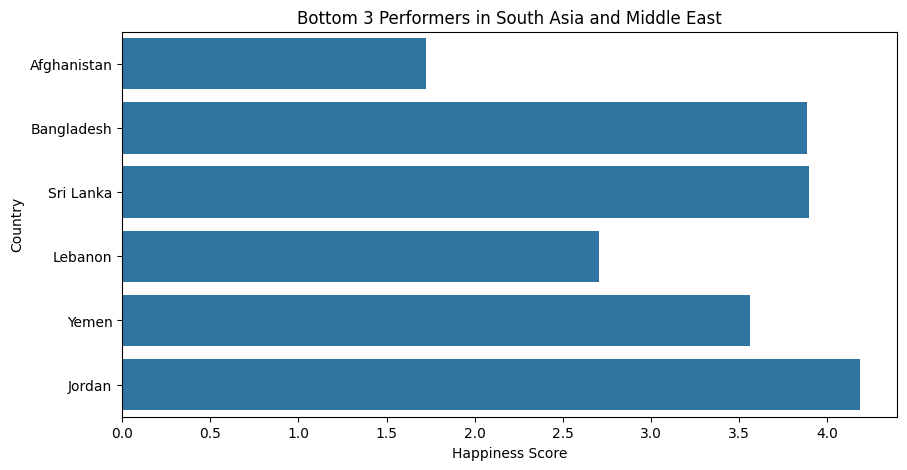

In [ ]:
#top and bottom three based on scores
top_3_sa = south_df.nlargest(3, 'score')
bottom_3_sa = south_df.nsmallest(3, 'score')

top_3_me = middle_df.nlargest(3, 'score')
bottom_3_me = middle_df.nsmallest(3, 'score')

#comparing top three countries
plt.figure(figsize=(10, 6))
sns.barplot(data = pd.concat([top_3_sa, top_3_me]), x = 'score', y = 'Country name', color = 'green')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.title('Top 3 Countries with Highest Happiness Scores')
plt.show()

# comparing the bottom charts
plt.figure(figsize=(10, 5))
sns.barplot(data=pd.concat([bottom_3_sa, bottom_3_me]), x='score', y='Country name')
plt.title('Bottom 3 Performers in South Asia and Middle East')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.show()


3. Metric Comparisons:

Text(0.5, 1.0, 'Comparison of Metrics in South Asia and Middle East')

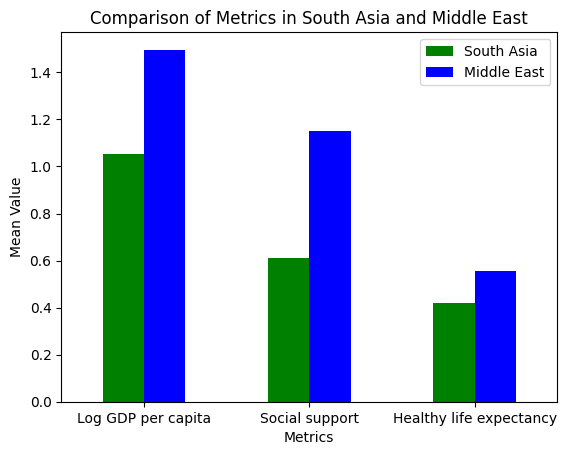

In [ ]:
#metrics to compare
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']

metrics_sa = south_df[metrics].mean()
metrics_me = middle_df[metrics].mean()

metric_comp = pd.DataFrame({'South Asia': metrics_sa, 'Middle East': metrics_me})
metric_comp.plot(kind='bar', color=['green', 'blue'])
plt.xticks(rotation=0)
plt.xlabel('Metrics')
plt.ylabel('Mean Value')
plt.title('Comparison of Metrics in South Asia and Middle East')


4. Happiness Disparity:

In [ ]:
# Compute range and coefficient of variation
range_sa = south_df[metrics].max() - south_df[metrics].min()
ca_sa = (std_sa /mean_sa) * 100
range_me = middle_df[metrics].max() - middle_df[metrics].min()
cv_me = (std_me / mean_me) * 100
print("Range of South Asia: ", range_sa)
print("\n")
print("Coefficient of Variation of South Asia: ", ca_sa)
print("\n")
print("Range of Middle East: ", range_me)
print("\n")
print("Coefficient of Variation of Middle East: ", cv_me)

Range of South Asia:  Log GDP per capita         0.733
Social support             1.179
Healthy life expectancy    0.344
dtype: float64


Coefficient of Variation of South Asia:  30.21482883337427


Range of Middle East:  Log GDP per capita         1.312
Social support             0.936
Healthy life expectancy    0.447
dtype: float64


Coefficient of Variation of Middle East:  28.938880812119404


5. Correlation Analysis:

Correlation between 'Freedom to make life choices' and 'score':  0.8005185224163315
Correlation between 'Generosity' and 'score':  0.874512371253192
Correlation between 'Freedom to make life choices' and 'score':  0.8632202433827543
Correlation between 'Generosity' and 'score':  0.6275236536964182


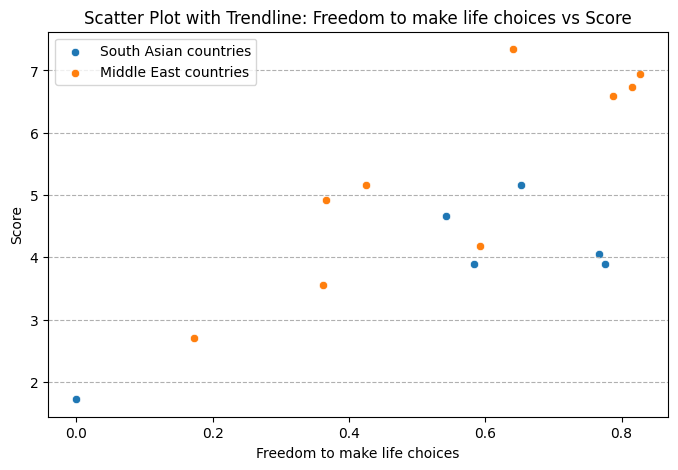

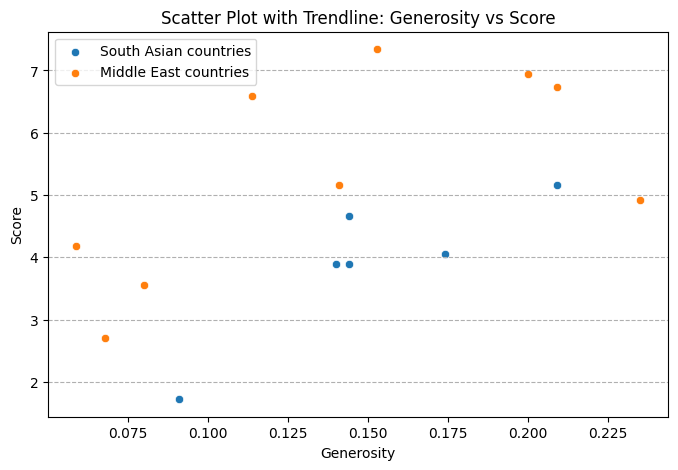

In [ ]:
# correlation of score with freedom and generosity
freedom_correlation_south = south_df['Freedom to make life choices'].corr(south_df['score'])
generosity_correlation_south = south_df['Generosity'].corr(south_df['score'])
print("Correlation between 'Freedom to make life choices' and 'score': ", freedom_correlation_south)
print("Correlation between 'Generosity' and 'score': ", generosity_correlation_south)

freedom_correlation_middle = middle_df['Freedom to make life choices'].corr(middle_df['score'])
generosity_correlation_middle = middle_df['Generosity'].corr(middle_df['score'])
print("Correlation between 'Freedom to make life choices' and 'score': ", freedom_correlation_middle)
print("Correlation between 'Generosity' and 'score': ", generosity_correlation_middle)


metrics = ['Freedom to make life choices', 'Generosity']

for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=metric, y='score', data=south_df, label='South Asian countries')
    sns.scatterplot(x=metric, y='score', data=middle_df, label='Middle East countries')
    plt.title(f"Scatter Plot with Trendline: {metric} vs Score")
    plt.xlabel(metric)
    plt.ylabel('Score')
    plt.grid(axis='y', linestyle='--')
    plt.legend()
    plt.show()


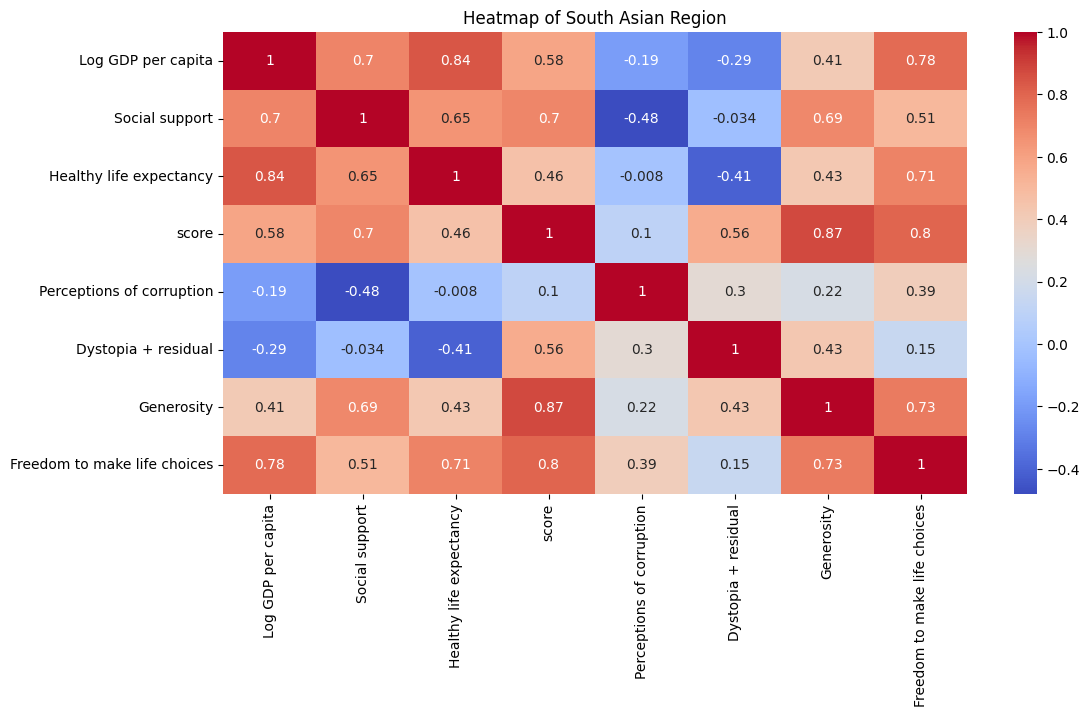

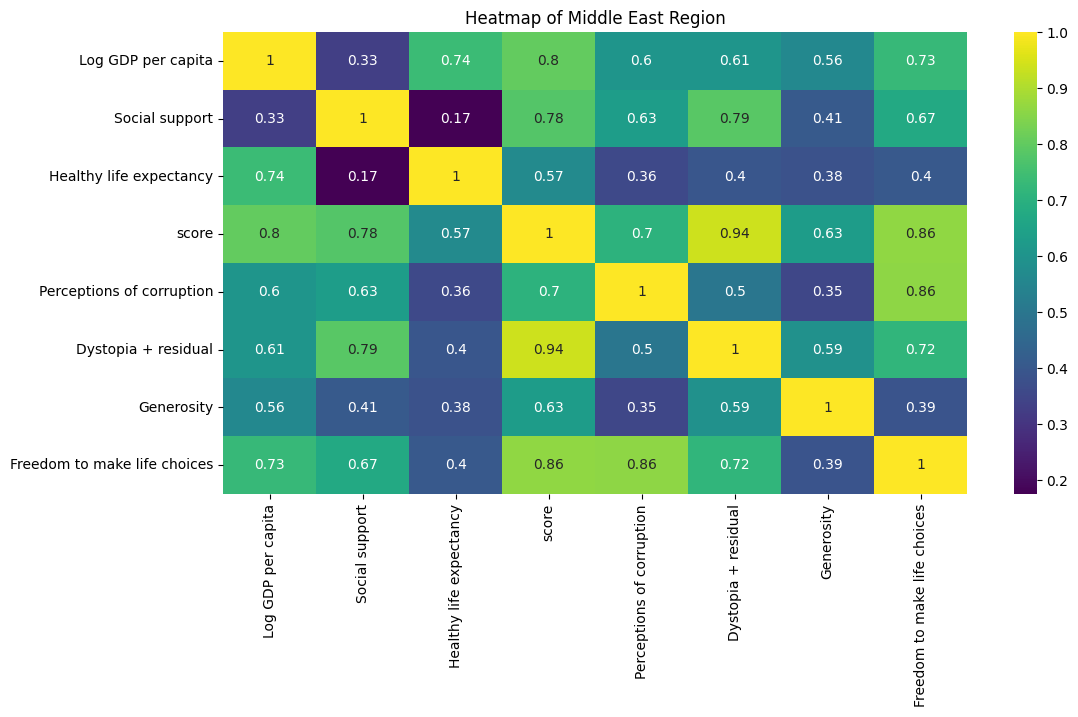

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(
    south_df[['Log GDP per capita', 'Social support', 'Healthy life expectancy',
                    'score', 'Perceptions of corruption', 'Dystopia + residual',
                    'Generosity', 'Freedom to make life choices']].corr(),
    annot=True, cmap='coolwarm'
)
plt.title('Heatmap of South Asian Region')
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(
    middle_df[['Log GDP per capita', 'Social support', 'Healthy life expectancy',
                    'score', 'Perceptions of corruption', 'Dystopia + residual',
                    'Generosity', 'Freedom to make life choices']].corr(),
    annot=True, cmap='viridis'
)
plt.title('Heatmap of Middle East Region')
plt.show()


6. Outlier Detection:

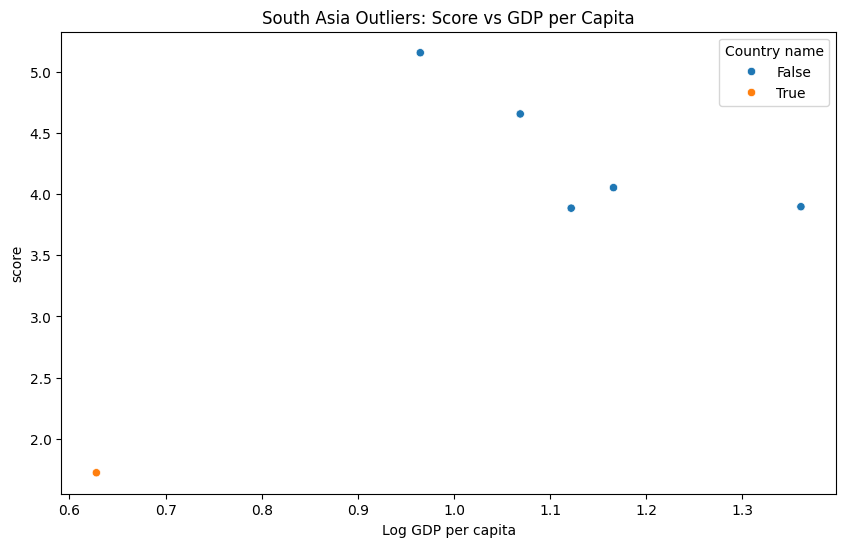

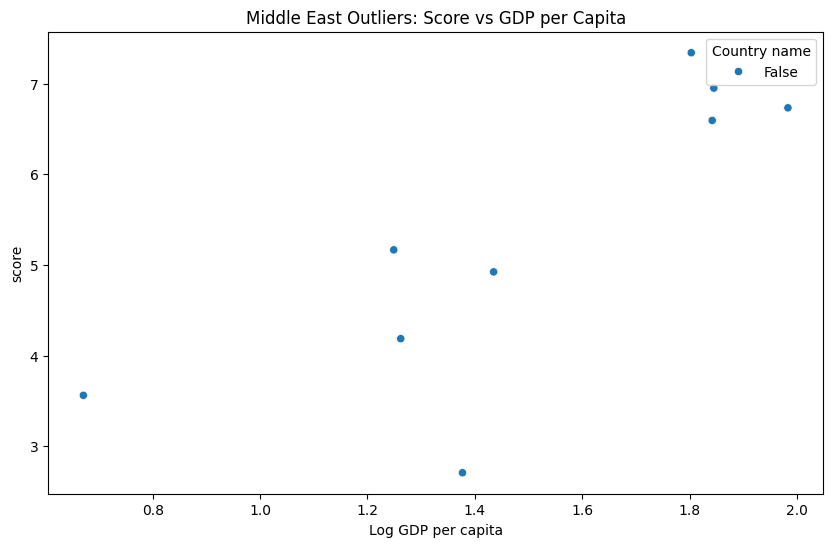

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to detect outliers based on IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)]

# Detect outliers for South Asia (south_df) based on Score and GDP per Capita
south_score_outliers = detect_outliers(south_df, 'score')
south_gdp_outliers = detect_outliers(south_df, 'Log GDP per capita')

# Detect outliers for Middle East (middle_df) based on Score and GDP per Capita
middle_score_outliers = detect_outliers(middle_df, 'score')
middle_gdp_outliers = detect_outliers(middle_df, 'Log GDP per capita')

# Plotting for South Asia (south_df)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=south_df, x='Log GDP per capita', y='score',
                hue=south_df['Country name'].isin(south_score_outliers['Country name']) |
                    south_df['Country name'].isin(south_gdp_outliers['Country name']))
plt.title('South Asia Outliers: Score vs GDP per Capita')
plt.show()

# Plotting for Middle East (middle_df)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=middle_df, x='Log GDP per capita', y='score',
                hue=middle_df['Country name'].isin(middle_score_outliers['Country name']) |
                    middle_df['Country name'].isin(middle_gdp_outliers['Country name']))
plt.title('Middle East Outliers: Score vs GDP per Capita')
plt.show()


Text(0.5, 1.0, 'Outliers in South Asia')

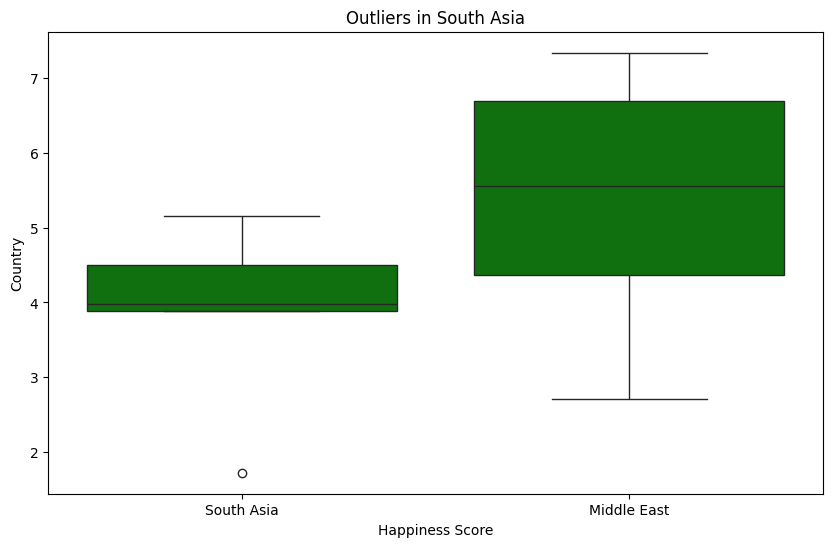

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=pd.concat([south_df.assign(Region='South Asia'), middle_df.assign(Region='Middle East')]), x='Region', y='score', color='green')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.title('Outliers in South Asia')